# Day02
今回も IrisDatasetを利用するので事前に、Iris-Virginicaの削除、標準化を行った後、
scikit-learnの `train_test_split` 関数で学習データとテストデータに分割しておく。

In [1]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

# ラベルが2の行をすべて削除
iris.data = iris.data[:100]
iris.target = iris.target[:100]

# 標準化
avg = np.average(iris.data)
std = np.std(iris.data)
iris.data = (iris.data-avg)/std

# データを学習用と推論用に分割
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

## ロジスティック回帰

### sigmoid関数
以下の式で定義され、入力を$[0,1]$の範囲に変換することができる。  
$\phi(z) = \frac{1}{1+e^{-z}}$

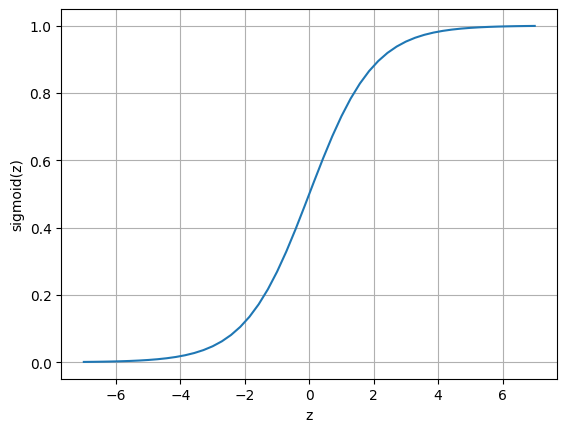

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid関数
def sigmoid(z: float) -> float:
    return 1 / (1 + np.exp(-z))

# プロット
z = np.linspace(-7, 7)
plt.grid()
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.plot(z, sigmoid(z))
plt.show()

## ロジスティック回帰の実装
前回実装したパーセプトロンクラスをもとに実装を行う。

パーセプトロンとの変更箇所を以下に示す。
### 決定関数 `threshhold`
判断材料が確率に変わったので、次のように判別することとする。  
$
threshhold(z) = 
    \begin{aligned}
        & \left\{ \,
            \begin{aligned}
                & 1 & \quad &(z \geq 0) \\
                & 0 & \quad &(z < 0)
            \end{aligned}
        \right.
    \end{aligned}
$

### 損失関数 `J`
ロジスティック回帰では対数尤度を最大化するのが目的なので損失関数を次の式に換装する。  
$
J(\bm{w}) = \sum_{i=1}^{n} [-y^{(i)} log(\phi (z^{(i)})) - (1-y^{(i)})log(1-\phi (z^{(i)}))]
$


### 勾配関数 `nablaJ`
パーセプトロンとは損失関数が異なるので、勾配関数も異なる。したがって次の式を用いる。  
$
\frac{\partial}{\partial w_j}J(\bm{w}) = (y - \phi(z))x_j
$

### 学習 `fit`
総入力$z$をsigmoid関数によって確率に変換する必要があるので決定関数の前にsigmoid関数を挿入する。
実装では前のセルで定義した `sigmoid(z)` 関数を利用している。

### 推論 `predict`
学習同様にsigmoid関数を挿入

### 確率の推論 `predict_proba`
そのクラスに属する確率を返す関数を実装


In [3]:
class LogisticRegression:
    
    # コンストラクタ
    def __init__(self, input_dim: int) -> None:
        self.w = np.random.randn(input_dim+1) * 0.0001
        
    # 決定関数
    def threshhold(self, z: float) -> int:
        return 1 if z >= 0.5 else 0
    
    # 損失関数
    def J(self) -> float:
        return np.sum([-y[i]*np.log(self.zs[i]) - (1-y[i])*np.log(1-self.zs[i]) for i in range(len(self.y))])
    
    # 損失関数の勾配
    def nablaJ(self) -> np.ndarray:
        return - self.x.T @ (self.y-self.zs)
    
    #　学習   
    def fit(self, X: np.ndarray, Y: np.ndarray, epoches: int=20, eta: float=0.01) -> None:
        
        # xを整形して、アトリビュートにする
        self.x = np.hstack((np.ones((len(X), 1)), X))
        self.y = Y
        
        # epochの回数、勾配を計算して重みを更新
        for epoch in range(epoches):
            
            # 勾配の計算用にφ(z)を格納するリスト
            self.zs = []

            # すべてのデータに対して、総入力、出力を計算
            for xi in self.x:
                z = self.w.T @ xi
                self.zs.append(sigmoid(z))
                
            # 勾配を計算して更新
            delta_w = -eta * self.nablaJ()
            self.w += delta_w
            
            # 途中経過を出力
            print('epoch: {:>2} | log-likelihood: {:.3f}'.format(epoch+1, self.J()))
        
    # 推論
    def predict(self, x: np.ndarray) -> np.ndarray:
        x = np.hstack((np.ones((len(x), 1)), x))
        return [self.threshhold(sigmoid(self.w.T @ xi)) for xi in x]
    
    # 確率推論
    def predict_proba(self, x: np.ndarray) -> np.ndarray:
        x = np.hstack((np.ones((len(x), 1)), x))
        return [[1-sigmoid(self.w.T @ xi), sigmoid(self.w.T @ xi)] for xi in x]


パーセプトロンと同様に学習を行うパーセプトロンとは異なり、
対数尤度が次第に大きくなっていることがわかる。

In [4]:
# 入力の次元数を渡してロジスティック回帰のインスタンスを生成
model = LogisticRegression(4)

# 学習
model.fit(X_train, y_train)

# 推論
pred = model.predict(X_test)

# 推論結果から正答率を出力してみる。
print('accuracy:', 100*np.sum(pred==y_test)/len(y_test), '%')

epoch:  1 | log-likelihood: 51.987
epoch:  2 | log-likelihood: 52.767
epoch:  3 | log-likelihood: 54.847
epoch:  4 | log-likelihood: 57.494
epoch:  5 | log-likelihood: 60.378
epoch:  6 | log-likelihood: 63.327
epoch:  7 | log-likelihood: 66.251
epoch:  8 | log-likelihood: 69.103
epoch:  9 | log-likelihood: 71.859
epoch: 10 | log-likelihood: 74.509
epoch: 11 | log-likelihood: 77.051
epoch: 12 | log-likelihood: 79.488
epoch: 13 | log-likelihood: 81.824
epoch: 14 | log-likelihood: 84.063
epoch: 15 | log-likelihood: 86.212
epoch: 16 | log-likelihood: 88.275
epoch: 17 | log-likelihood: 90.259
epoch: 18 | log-likelihood: 92.169
epoch: 19 | log-likelihood: 94.009
epoch: 20 | log-likelihood: 95.784
accuracy: 100.0 %


次に、`LogisticRegression` クラス内に実装した `predict_proba` メソッドを利用して、
テストデータがそのそれぞれのクラスに属する、確率を見てみる。結果を見ると予測の他に、確率を計算しいることもわかる。

In [5]:
pred_proba = model.predict_proba(X_test)

print('{:^6} | {:^6} | {:^6} | {}'.format('class0', 'class1','predict' ,'answer'))
for i in range(len(y_test)):
    proba = pred_proba[i]
    print('{:5.2f}% | {:5.2f}% | {:^7} | {:^5}'.format(proba[0]*100, proba[1]*100, pred[i], y_test[i]))

class0 | class1 | predict | answer
12.28% | 87.72% |    1    |   1  
 3.88% | 96.12% |    1    |   1  
90.70% |  9.30% |    0    |   0  
84.77% | 15.23% |    0    |   0  
90.28% |  9.72% |    0    |   0  
11.88% | 88.12% |    1    |   1  
89.55% | 10.45% |    0    |   0  
19.00% | 81.00% |    1    |   1  
91.59% |  8.41% |    0    |   0  
 6.04% | 93.96% |    1    |   1  
 4.52% | 95.48% |    1    |   1  
91.84% |  8.16% |    0    |   0  
90.45% |  9.55% |    0    |   0  
 6.07% | 93.93% |    1    |   1  
13.15% | 86.85% |    1    |   1  
89.43% | 10.57% |    0    |   0  
12.99% | 87.01% |    1    |   1  
90.23% |  9.77% |    0    |   0  
90.25% |  9.75% |    0    |   0  
92.60% |  7.40% |    0    |   0  
89.26% | 10.74% |    0    |   0  
85.27% | 14.73% |    0    |   0  
 8.95% | 91.05% |    1    |   1  
 7.60% | 92.40% |    1    |   1  
 4.10% | 95.90% |    1    |   1  


## `scikit-learn` の利用

Pythonの機械学習ライブラリである`scikit-learn`に実装されているロジスティック回帰モデルを利用することで、
簡単に、ロジスティック回帰モデルを利用することができる。以下に例を示す。

In [6]:
from sklearn.linear_model import LogisticRegression

# インスタンスの生成
lr = LogisticRegression()

# 学習(ログは出ないので注意)
lr.fit(X_train, y_train)

# 推論
pred = model.predict(X_test)

# 推論結果から正答率を出力してみる。
print('accuracy:', 100*np.sum(pred==y_test)/len(y_test), '%')


accuracy: 100.0 %


スクラッチ実装した、ロジスティック回帰モデルと同様に、確率を出すには `predict_proba` メソッドを利用する。

In [7]:
pred_proba = lr.predict_proba(X_test)

print('{:^6} | {:^6} | {:^6} | {}'.format('class0', 'class1','predict' ,'answer'))
for i in range(len(y_test)):
    proba = pred_proba[i]
    print('{:5.2f}% | {:5.2f}% | {:^7} | {:^5}'.format(proba[0]*100, proba[1]*100, pred[i], y_test[i]))

class0 | class1 | predict | answer
 6.71% | 93.29% |    1    |   1  
 1.90% | 98.10% |    1    |   1  
94.40% |  5.60% |    0    |   0  
88.55% | 11.45% |    0    |   0  
93.11% |  6.89% |    0    |   0  
 6.09% | 93.91% |    1    |   1  
93.42% |  6.58% |    0    |   0  
11.16% | 88.84% |    1    |   1  
94.37% |  5.63% |    0    |   0  
 3.14% | 96.86% |    1    |   1  
 1.95% | 98.05% |    1    |   1  
94.62% |  5.38% |    0    |   0  
93.96% |  6.04% |    0    |   0  
 2.94% | 97.06% |    1    |   1  
 6.99% | 93.01% |    1    |   1  
92.89% |  7.11% |    0    |   0  
 6.39% | 93.61% |    1    |   1  
94.13% |  5.87% |    0    |   0  
94.54% |  5.46% |    0    |   0  
94.92% |  5.08% |    0    |   0  
93.16% |  6.84% |    0    |   0  
88.88% | 11.12% |    0    |   0  
 3.94% | 96.06% |    1    |   1  
 3.34% | 96.66% |    1    |   1  
 1.86% | 98.14% |    1    |   1  


## 線形SVM
線形SVMを`scikit-learn` 利用して実装する。
ここでSVCの引数、`C`は誤分類に対する厳密さであり、`C`を小さくすると誤分類に対して寛大になる。

In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

# 推論結果から正答率を出力してみる。
print('accuracy:', 100*np.sum(pred==y_test)/len(y_test), '%')

accuracy: 100.0 %


## 非線形SVM
次は線形SVMと同様に`scikit-learn` 使って非線形SVMを実装していく。

現在利用している、Iris-Datasetは線形分離可能なので、線形分離不可能なノイズ入りのXORデータセットを利用する。

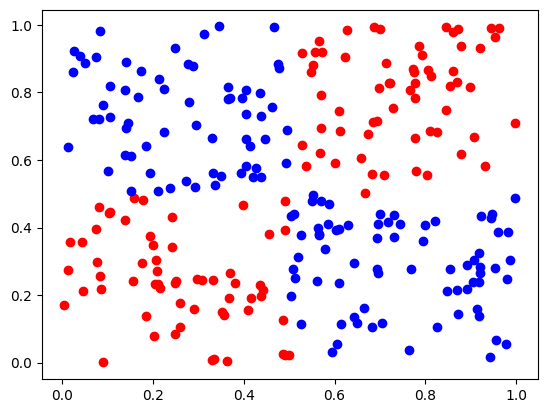

In [9]:
import matplotlib.pyplot as plt

# XORのデータセットを作成
X = np.random.rand(256, 2)
Y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5)

# プロットして表示
for x, y in zip(X, Y):
    plt.scatter(x[0], x[1], c=('b' if y else 'r'))
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

上記のデータを非線形SVMを利用して、非線形分離を行ってみる。
線形SVMとの違いは `kernel` に利用するカーネルを指定するだけでよい。
学習が管理ょすうると、線形分離不可能なデータに対してそれなりの分類精度が出ていることがわかる。

In [10]:
from sklearn.svm import SVC

# 非線形SVMのインスタンスを作成
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

# 学習
svm.fit(X_train, y_train)

# 推論
pred = svm.predict(X_test)

# 推論結果から正答率を出力してみる。
print('accuracy:', 100*np.sum(pred==y_test)/len(y_test), '%')

accuracy: 95.3125 %
